In [20]:
# Import the necessary features for this exercise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Dataset = Airbnb listings doc for Austin, TX

Outcome Variable = review_scores_value (int, 1-10)

Categorical Variable 1 = property_type (string)

Continuous Variable 1 = host_listings_count (int)

Continuous Variable 2 = accommodates (int)

Continuous Variable 3 = bathrooms (int)

Continuous Variable 4 = bedrooms (int)

C:\Users\maken\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\maken\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


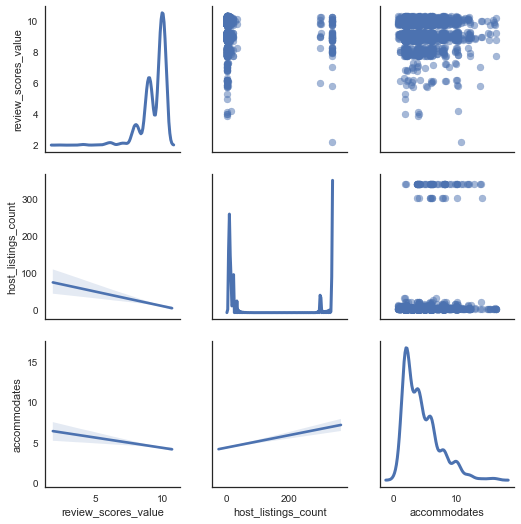

In [22]:
# Bivariate analysis for two continuous variables:
# Improve the aesthetics
sns.set_style("white")

# Import the data
df = pd.read_csv('C:\\Users\\maken\\Fixed_Listings.csv')

# Take a subset of the data to make plots clearer.
df_use = df.loc[
    ((df['property_type'] == 'House') | (df['property_type'] == 'Apartment')),
    ['review_scores_value', 'host_listings_count', 'accommodates', 'bathrooms', 'bedrooms']
]


# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
df_jittered = df_use.loc[:, 'review_scores_value' : 'accommodates'].dropna()

jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size =(df_jittered.shape)),
    columns = df_jittered.columns
                     )
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [41]:
# Bivariate Analysis for a Continuous and Categorical Pair:

# Plot all variables with boxplots for each property type.
# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_box = df
df_box = pd.melt(df_box, id_vars = ['property_type'])
print(df.head())
print(df_box.head())
df_box = df_box.dropna()


g = sns.FacetGrid(df_box, col='variable', size = 4, aspect = .5)
g = g.map(sns.boxplot, 'property_type', 'review_scores_value')
plt.show()

# Descriptive statistics by group.
print(df.groupby('property_type').describe())

# Test whether group differences are signficant.
for col in df.loc[:,'review_scores_value':'property_type'].columns:
    print(col)
    print(stats.ttest_ind(
        df_use[df_use['property_type'] == 'House'][col].dropna(),
        df_use[df_use['property_type'] == 'Apartment'][col].dropna()
    ))

        id                           listing_url     scrape_id last_scraped  \
0    72635    https://www.airbnb.com/rooms/72635  2.020000e+13    11/8/2015   
1  5386323  https://www.airbnb.com/rooms/5386323  2.020000e+13    11/7/2015   
2  8826517  https://www.airbnb.com/rooms/8826517  2.020000e+13    11/7/2015   
3  8828616  https://www.airbnb.com/rooms/8828616  2.020000e+13    11/8/2015   
4  8536913  https://www.airbnb.com/rooms/8536913  2.020000e+13    11/8/2015   

                             name  \
0   3 Private Bedrooms, SW Austin   
1                 Cricket Trailer   
2  Private room 1 in South Austin   
3  Private room 2 in South Austin   
4       Brand-New 3BR Austin Home   

                                             summary  \
0  Conveniently located 10-15 from downtown in SW...   
1  Rent this cool concept trailer that has everyt...   
2  Upstairs, private, 12ft x 13 1/2ft room.  Priv...   
3  Upstairs, private, 11ft x 13 1/2ft room.  Priv...   
4  Brand-new 3BR/2BA A

KeyError: "['review_scores_value'] not in index"

### Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

In [ ]:
# Create a feature for property type = Apartment and property type = House
features['Apartment'] = np.where(df_use['property_type'] == 'Apartment', 1, 0)
features['House'] = np.where(df_use['property_type'] == 'House', 1, 0)


### Finally, use filtering methods to select the five best features and justify your choices.